In [2]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Kegunaan: Menampilkan dimensi dataframe dalam format (baris, kolom).
df.shape

(768, 9)

In [6]:
#Kegunaan: Menampilkan ringkasan informasi dari dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Kegunaan: Menampilkan statistik deskriptif untuk kolom numerik.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#Kegunaan: Mengecek jumlah data yang kosong (NaN/null) di tiap kolom.
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


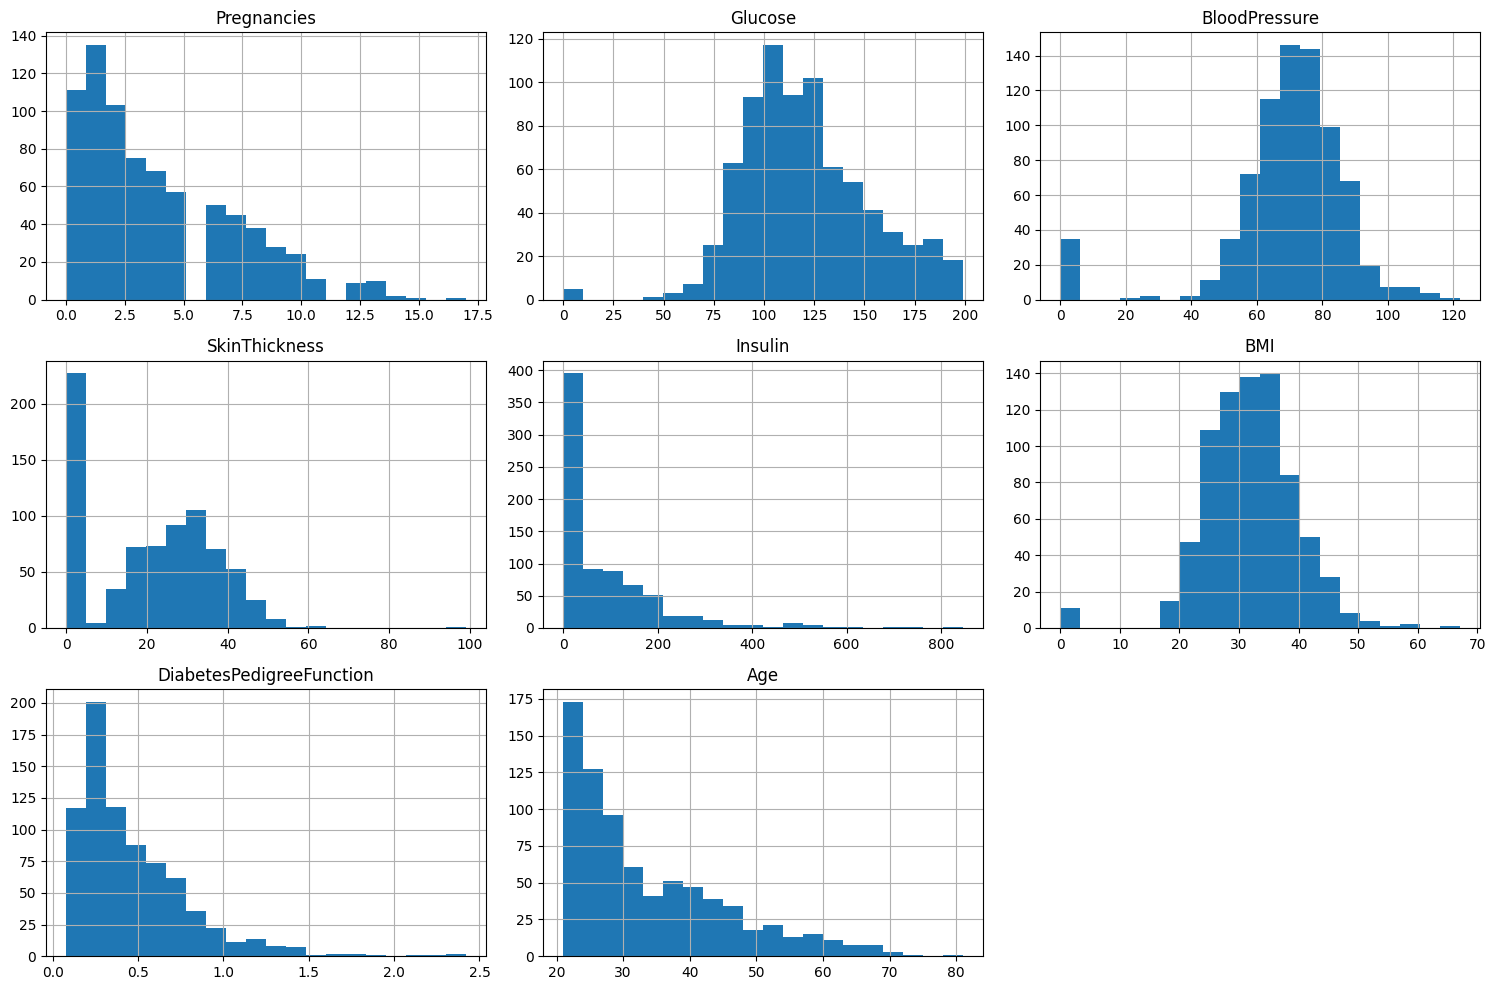

In [9]:
#Visualisasi Distribusi Setiap Kolom
import matplotlib.pyplot as plt
import seaborn as sns

#kolom numerik
cols = df.columns[:-1]

# Plot histogram untuk tiap fitur
df[cols].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

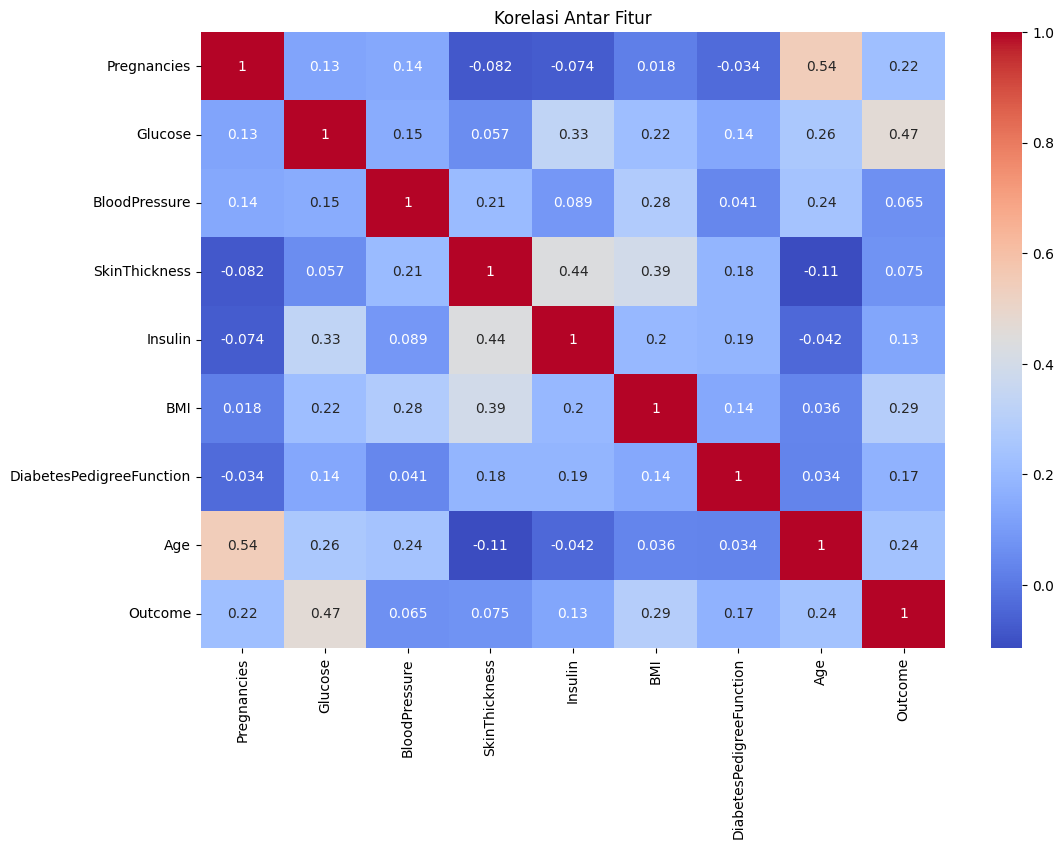

In [10]:
#Cek Korelasi antar Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [12]:
#Analisis Tabel Berdasarkan Outcome (0 dan 1)
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


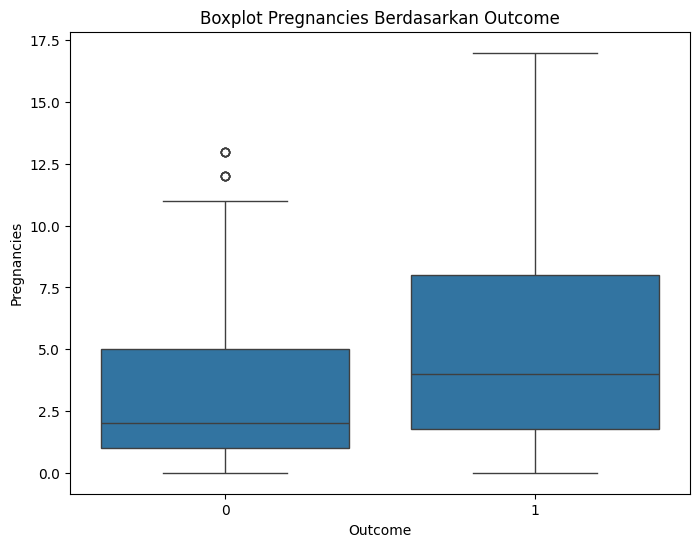

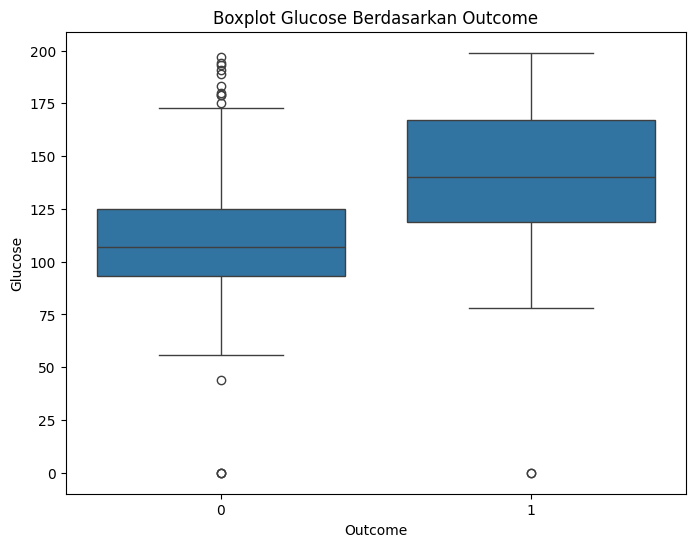

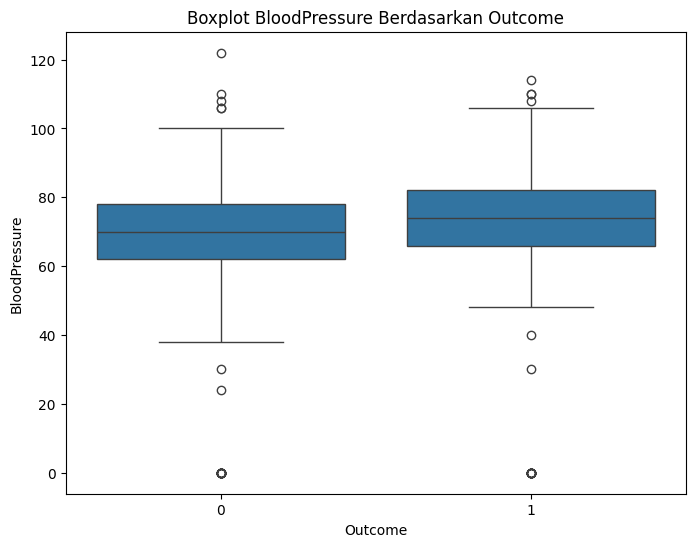

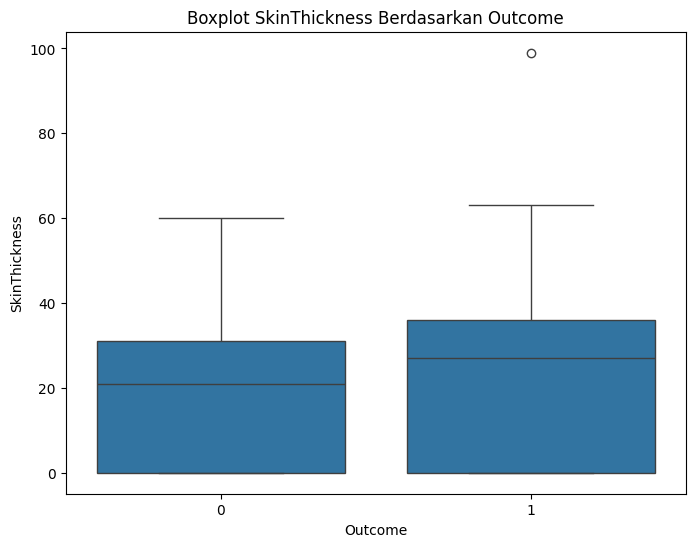

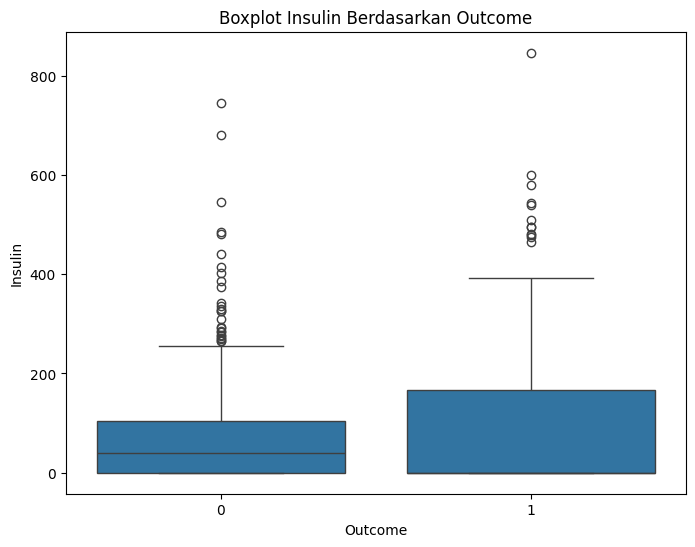

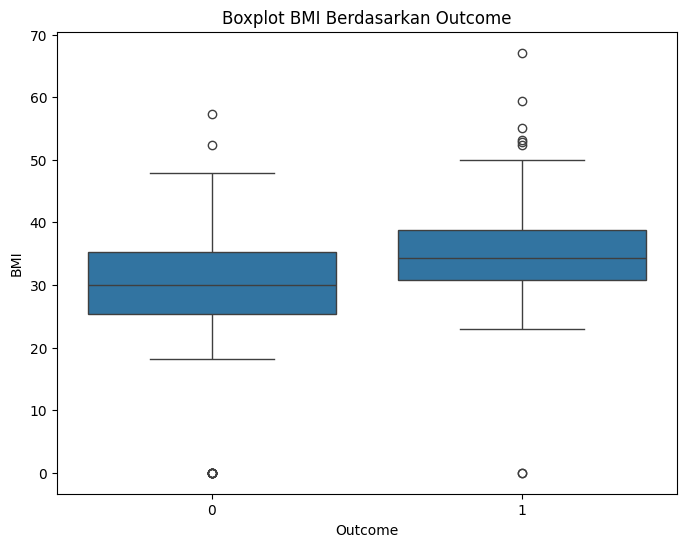

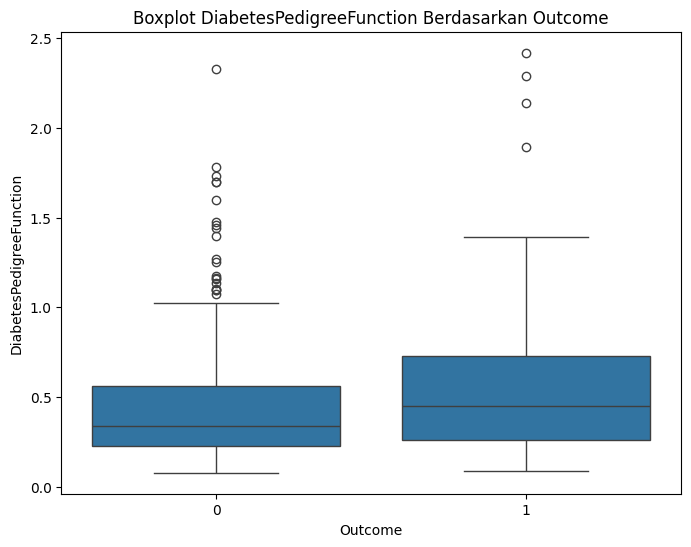

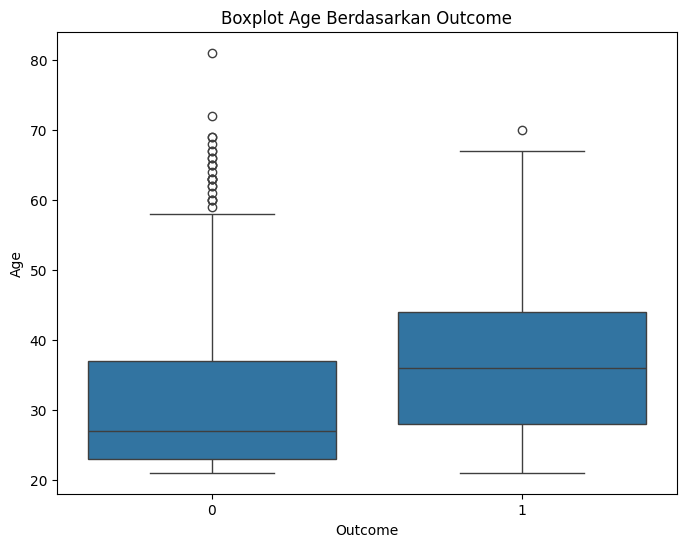

In [13]:
#Boxplot Setiap Fitur Berdasarkan Outcome
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Boxplot {col} Berdasarkan Outcome')
    plt.show()


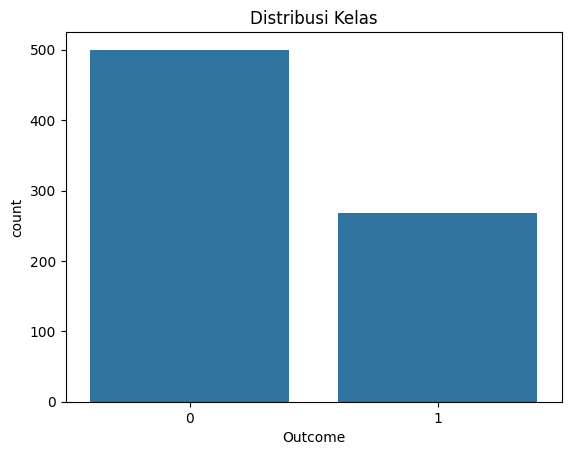

In [14]:
#Distribusi Kelas (Imbalanced atau Tidak?)
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Kelas')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ganti nilai 0 jadi NaN untuk kolom tertentu
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, pd.NA)

# Convert relevant columns to numeric dtype
for col in cols_to_replace:
  df[col] = pd.to_numeric(df[col])

# Isi NaN dengan median kolom
df.fillna(df.median(numeric_only=True), inplace=True)

# Konversi tipe data object ke tipe yang sesuai
df = df.infer_objects(copy=False)

# Pisahkan fitur dan target
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [19]:
#Coba Beberapa Model ML & Bandingkan\
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Latih dan uji model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - Akurasi: {acc:.4f}")

Logistic Regression - Akurasi: 0.7532
Random Forest - Akurasi: 0.7403
KNN - Akurasi: 0.7338


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

# Evaluasi
from sklearn.metrics import accuracy_score

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("Best Akurasi di Test Set:", acc)
print("Best Params:", grid.best_params_)


Best Akurasi di Test Set: 0.7402597402597403
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [21]:
from google.colab import files
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("diabetes.csv")

# Ganti nilai 0 jadi NaN untuk kolom tertentu
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, pd.NA)

# Isi NaN dengan median kolom (hanya kolom numerik)
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert relevant columns to numeric dtype
for col in cols_to_replace:
  df[col] = pd.to_numeric(df[col])


# Pisahkan fitur dan target
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Saving diabetes.csv to diabetes (1).csv
Best Score: 0.785072637611622
Best Params: {'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 100}


In [22]:
print(y.value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [23]:
import joblib
joblib.dump(grid.best_estimator_, 'model_diabetes.pkl')


['model_diabetes.pkl']

In [24]:
sample = [[1, 99, 64, 28, 100, 24.2, 0.2, 22]]  # rendah risiko
sample = [[5, 155, 80, 35, 130, 38.0, 0.8, 45]]  # glukosa & BMI tinggi

sample_scaled = scaler.transform(sample)
prediction = grid.best_estimator_.predict(sample_scaled)

print("Prediksi:", "Diabetes" if prediction[0] == 1 else "Tidak Diabetes")



Prediksi: Diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
importances = grid.best_estimator_.feature_importances_
for name, score in zip(x.columns, importances):
    print(f"{name}: {score:.4f}")


Pregnancies: 0.0677
Glucose: 0.2557
BloodPressure: 0.0814
SkinThickness: 0.0769
Insulin: 0.1010
BMI: 0.1670
DiabetesPedigreeFunction: 0.1095
Age: 0.1408


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil skor pentingnya fitur dari model terbaik
importances = grid.best_estimator_.feature_importances_

# Buat DataFrame untuk kejelasan
feature_importance_df = pd.DataFrame({
    'Fitur': x.columns,
    'Pentingnya': importances
}).sort_values(by='Pentingnya', ascending=False)

# Tampilkan
print(feature_importance_df)


                      Fitur  Pentingnya
1                   Glucose    0.255663
5                       BMI    0.166974
7                       Age    0.140847
6  DiabetesPedigreeFunction    0.109494
4                   Insulin    0.101035
2             BloodPressure    0.081405
3             SkinThickness    0.076867
0               Pregnancies    0.067716


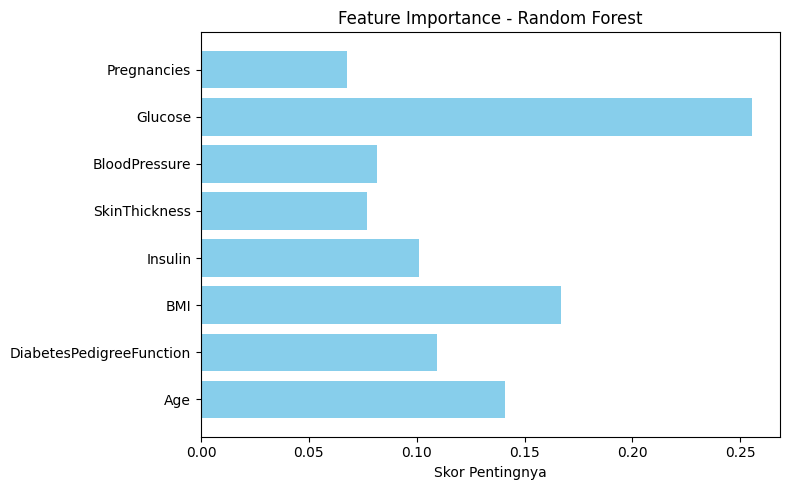

In [27]:
import matplotlib.pyplot as plt

features = x.columns
plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Skor Pentingnya")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # agar fitur penting di atas
plt.tight_layout()
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [29]:
import joblib

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [30]:
from google.colab import files
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('model_diabetes.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
import pandas as pd
import numpy as np

# Baca file CSV
df = pd.read_csv("diabetes.csv")

# Kolom yang tidak boleh bernilai 0
kolom_bersihkan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti 0 menjadi NaN
for col in kolom_bersihkan:
    df[col] = df[col].apply(lambda x: np.nan if x == 0 else x)

# Isi NaN dengan median kolom
df.fillna(df.median(numeric_only=True), inplace=True)

# Simpan hasil bersih (opsional)
df.to_csv("diabetes_clean.csv", index=False)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Pisahkan fitur dan label
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Latih model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Simpan model dan scaler
joblib.dump(model, "model_diabetes_clean.pkl")
joblib.dump(scaler, "scaler_clean.pkl")


['scaler_clean.pkl']

In [33]:
files.download("model_diabetes_clean.pkl")
files.download("scaler_clean.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
files.download("diabetes_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>